In [47]:
# Import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

In [48]:
#reading the dataset file using pandas
Data = pd.read_excel('AirQualityUCI.xlsx')

In [49]:
Data.head()
#it returns the first five records

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [50]:
Data.tail()
#it returns the last five records

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [51]:
Data.shape
#shows number of rows and columns in the dataset

(9357, 15)

In [52]:
Data.describe().T
# Generate descriptive statistics

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.600000,1.500000,2.600000,11.900000
PT08.S1(CO),9357.0,1048.869652,329.817015,-200.0,921.000000,1052.500000,1221.250000,2039.750000
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.000000,-200.000000,-200.000000,1189.000000
C6H6(GT),9357.0,1.865576,41.380154,-200.0,4.004958,7.886653,13.636091,63.741476
PT08.S2(NMHC),9357.0,894.475963,342.315902,-200.0,711.000000,894.500000,1104.750000,2214.000000
NOx(GT),9357.0,168.604200,257.424561,-200.0,50.000000,141.000000,284.200000,1479.000000
PT08.S3(NOx),9357.0,794.872333,321.977031,-200.0,637.000000,794.250000,960.250000,2682.750000
NO2(GT),9357.0,58.135898,126.931428,-200.0,53.000000,96.000000,133.000000,339.700000
PT08.S4(NO2),9357.0,1391.363266,467.192382,-200.0,1184.750000,1445.500000,1662.000000,2775.000000
PT08.S5(O3),9357.0,974.951534,456.922728,-200.0,699.750000,942.000000,1255.250000,2522.750000


In [53]:
Data.info()
#information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

Data Pre Processing

In [54]:
Data.isnull().sum()
# Checking and counting for missing data points for each column

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [55]:
ModeValueForColor=Data['CO(GT)'].mode()[0]
print('mode value for COGT column is: ',ModeValueForColor)
# Finding out the mode value for color column

mode value for COGT column is:  -200.0


In [56]:
print(Data.isnull().sum())
print(Data.info())
# Now we can see all columns have zero missing values

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null 

In [57]:
Data['CO(GT)'].value_counts()
# returns object containing counts of unique values

-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 7.6         1
 9.9         1
 11.5        1
 9.4         1
 11.9        1
Name: CO(GT), Length: 97, dtype: int64

In [58]:
Data.columns
#find columns name air quality is working as data frame

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [59]:
Data.dtypes
#datatype of each attribute

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [60]:
# FINDING -200 USING SIMPLE FOR LOOPS WHICH CAN ALSO BE DONE WITH VALUE_COUNTS AND THEN REPLACED
l=[]
for i in range(len(Data.columns)):
    f=Data.columns[i]
    count=0
    for j in range(len(Data[f])):
        if Data[f][j]==-200:
            count+=1
    l.append((f,count))                     
print("Values from each column that needs to be replaced with avg \n ",l)

Values from each column that needs to be replaced with avg 
  [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443), ('C6H6(GT)', 366), ('PT08.S2(NMHC)', 366), ('NOx(GT)', 1639), ('PT08.S3(NOx)', 366), ('NO2(GT)', 1642), ('PT08.S4(NO2)', 366), ('PT08.S5(O3)', 366), ('T', 366), ('RH', 366), ('AH', 366)]


In [61]:
num=Data._get_numeric_data()
num[num<0]=0
Data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [62]:
Data['CO(GT)'].value_counts()
# all -200 are replaced with 0

0.0     1683
1.0      305
1.4      279
1.6      275
1.5      273
        ... 
11.5       1
10.1       1
9.3        1
9.5        1
11.9       1
Name: CO(GT), Length: 97, dtype: int64

In [63]:
Data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.692672,21.373731,9.688596,902.298983,203.636796,802.695353,93.232617,1399.186287,982.774554,17.600720,47.306631,0.985416
std,1.554264,301.232260,91.103489,7.559609,318.681183,214.984126,299.341439,61.468588,441.442059,438.060087,9.356178,19.473998,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,0.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,0.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9352    3.1
9353    2.4
9354    2.4
9355    2.1
9356    2.2
Name: CO(GT), Length: 9357, dtype: float64


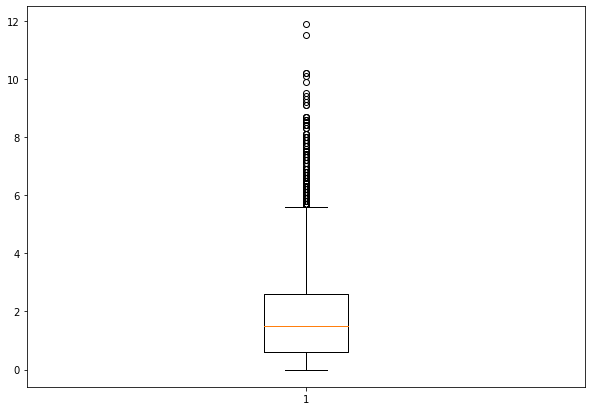

In [64]:
# Outlier in Dataset is just -200

#Creating dataset 
np.random.seed(10) 
data =Data["CO(GT)"]
print(data)
fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(data) 

# show plot 
plt.show()

In [65]:
Data.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.442803,0.249731,0.670790,0.533061,0.811449,-0.513070,0.723154,0.282080,0.586753,-0.079253,-0.018418,-0.092964
PT08.S1(CO),0.442803,1.000000,0.213250,0.786143,0.922093,0.356291,-0.075630,0.284508,0.823505,0.886880,0.300359,0.417492,0.403123
NMHC(GT),0.249731,0.213250,1.000000,0.198346,0.170037,-0.003611,-0.033366,0.099541,0.196691,0.155224,-0.025205,-0.020121,-0.071580
C6H6(GT),0.670790,0.786143,0.198346,1.000000,0.926265,0.543665,-0.457762,0.402581,0.734014,0.862751,0.275852,0.074847,0.261013
PT08.S2(NMHC),0.533061,0.922093,0.170037,0.926265,1.000000,0.419047,-0.240806,0.334108,0.855763,0.903060,0.400031,0.215377,0.393508
NOx(GT),0.811449,0.356291,-0.003611,0.543665,0.419047,1.000000,-0.514602,0.795888,0.068429,0.553223,-0.268778,0.079334,-0.210622
PT08.S3(NOx),-0.513070,-0.075630,-0.033366,-0.457762,-0.240806,-0.514602,1.000000,-0.440202,-0.002102,-0.352407,0.092534,0.223613,0.068493
NO2(GT),0.723154,0.284508,0.099541,0.402581,0.334108,0.795888,-0.440202,1.000000,0.010185,0.439057,-0.195749,-0.125245,-0.324221
PT08.S4(NO2),0.282080,0.823505,0.196691,0.734014,0.855763,0.068429,-0.002102,0.010185,1.000000,0.694715,0.641916,0.291896,0.719606
PT08.S5(O3),0.586753,0.886880,0.155224,0.862751,0.903060,0.553223,-0.352407,0.439057,0.694715,1.000000,0.149302,0.318989,0.259548


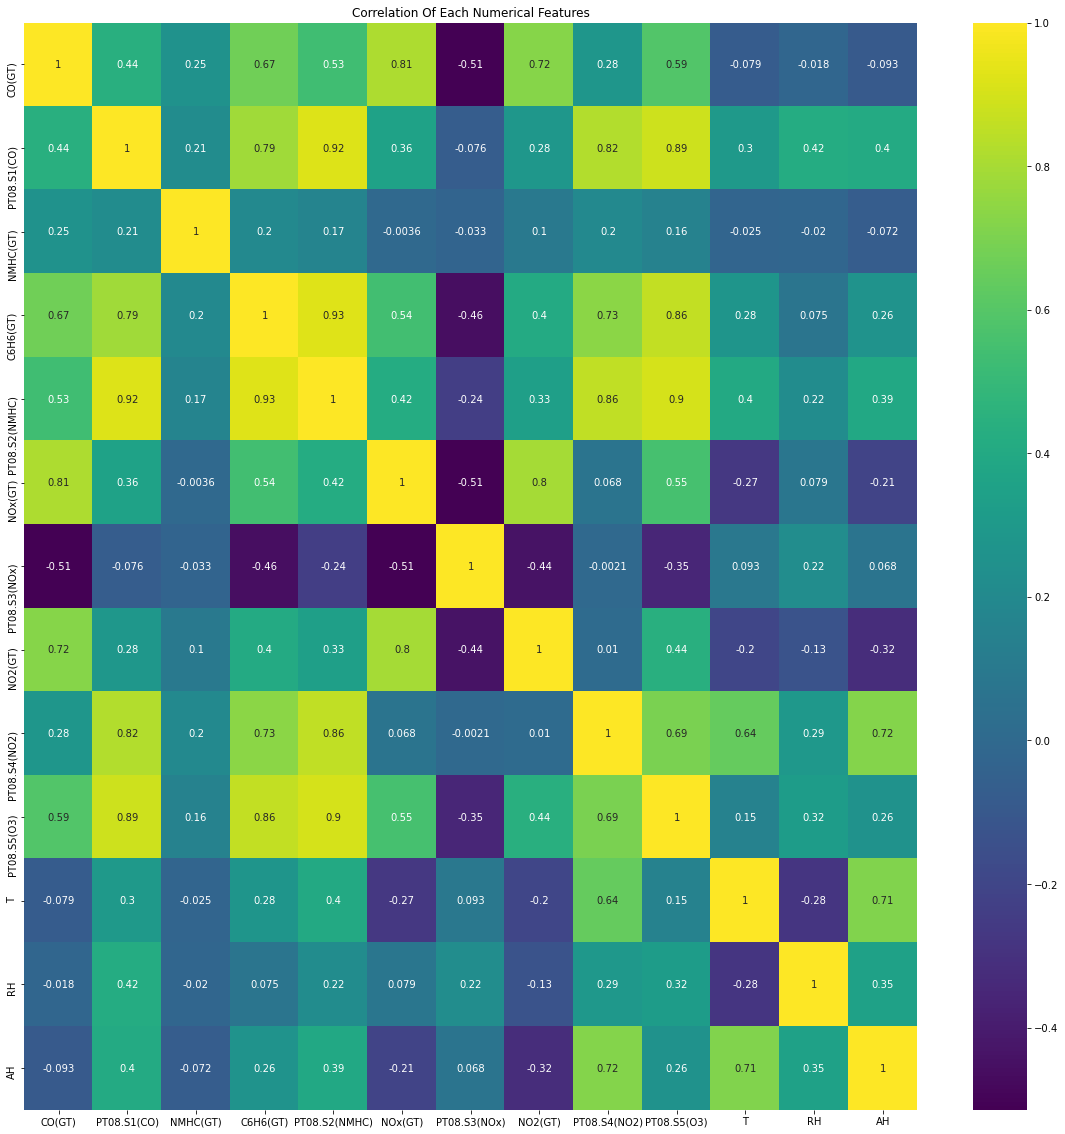

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot=True,cmap='viridis')
plt.title("Correlation Of Each Numerical Features")
plt.show()

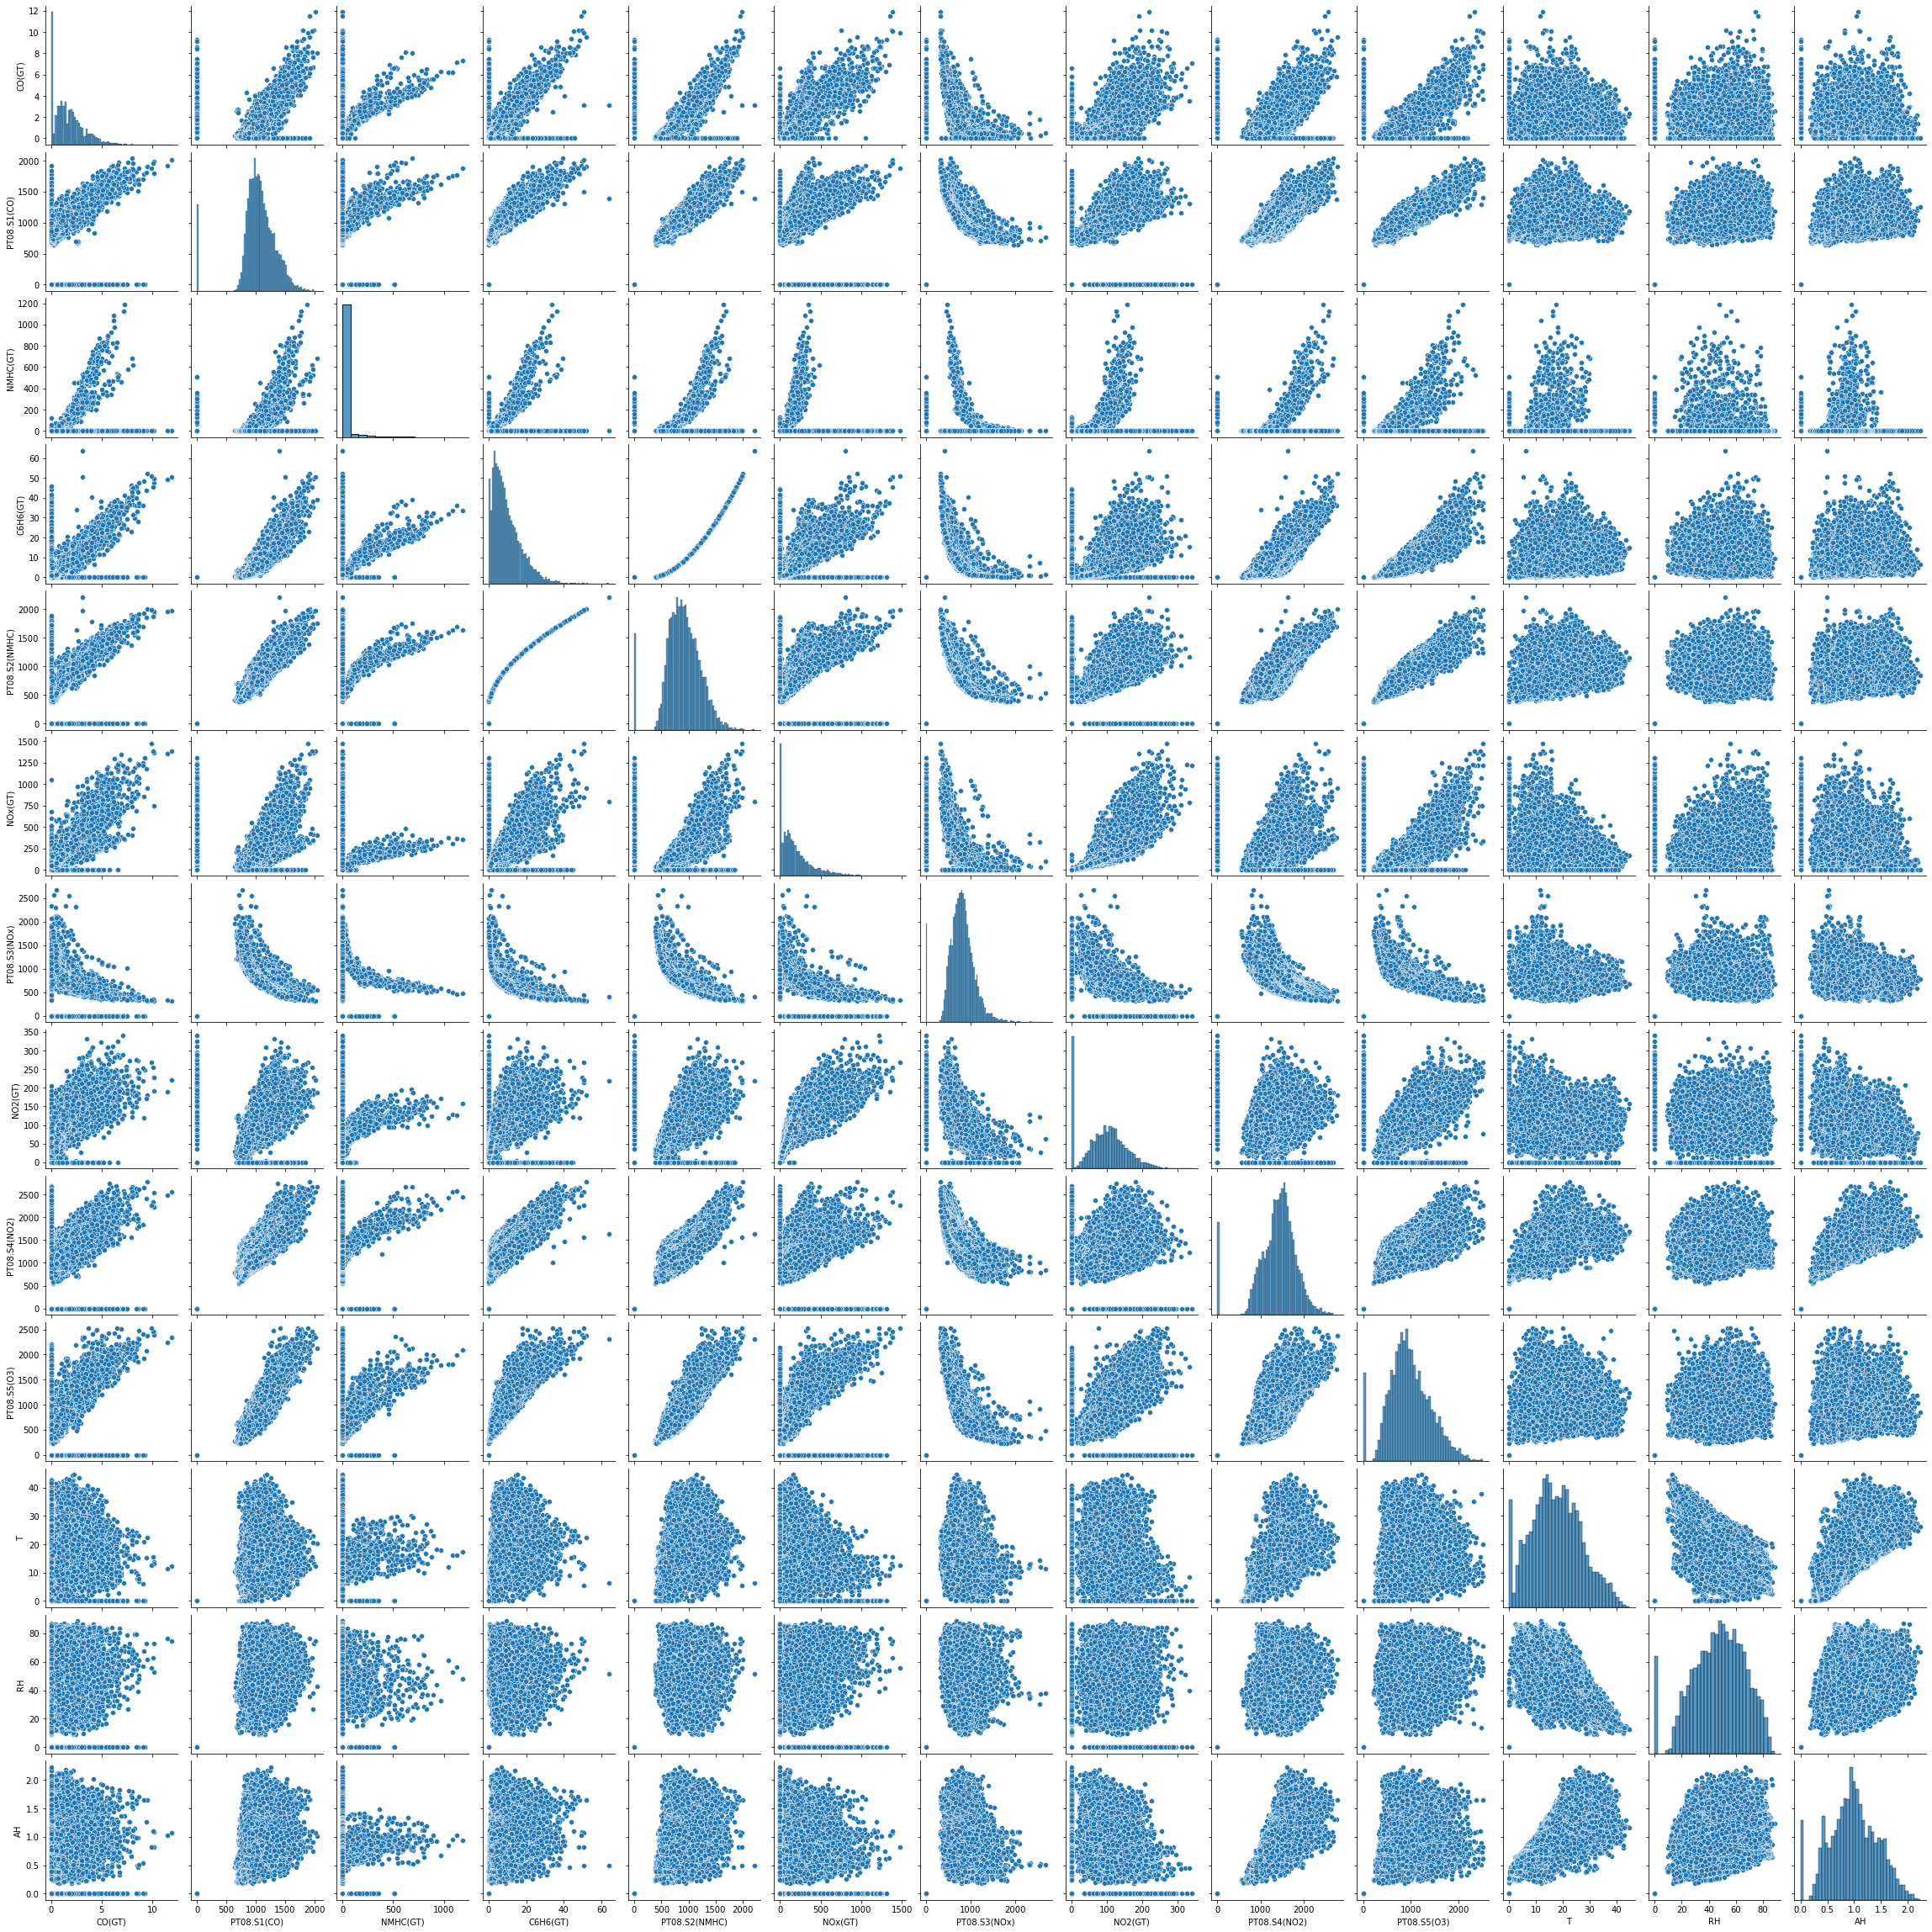

In [67]:
sns.pairplot(Data)

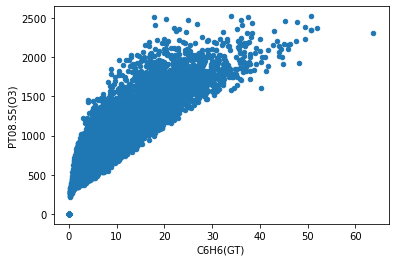

In [68]:
Data.plot(kind='scatter',x='C6H6(GT)',y='PT08.S5(O3)')
plt.show()

<AxesSubplot:ylabel='Frequency'>

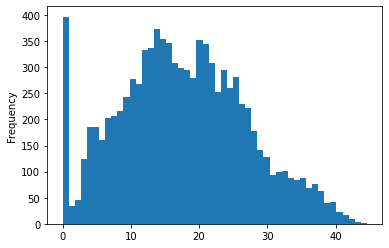

In [69]:
Data["T"].plot.hist(bins=50)

In [70]:
#features
X=Data
X=X.drop('Date',axis=1)
X=X.drop('Time',axis=1)
X=X.drop('C6H6(GT)',axis=1)

In [71]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [72]:
 y= Data['C6H6(GT)']

In [73]:
y.head()

0    11.881723
1     9.397165
2     8.997817
3     9.228796
4     6.518224
Name: C6H6(GT), dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 50)
from sklearn import metrics

In [75]:
print(X_train.shape,y_train.shape)

(6549, 12) (6549,)


In [76]:
print(X_test.shape,y_test.shape)

(2808, 12) (2808,)


In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
lr.score(X_train, y_train)

0.9607545031372735

In [86]:
lr.score(X_test, y_test)

0.9565912769846396

In [87]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [89]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))

R^2: 0.999990123467956
MAE: 0.0026248031787458916
MSE: 0.0005584874361164627


In [90]:
from sklearn.model_selection import cross_val_score

cv1_score = cross_val_score(reg,X_train,y_train, cv=5)

In [91]:
np.mean(cv1_score)

0.9998944032491746

In [92]:
reg.score(X_test, y_test)

0.9981269923174937

In [93]:
conda install -c anaconda py-xgboost


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/anaconda/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/anaconda/win-64'




In [94]:
import xgboost as xg
from xgboost import XGBRegressor

In [95]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [96]:
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)
print('Training score:', score)

Training score: 0.9999928470363617


In [97]:
cv_score = cross_val_score(xgbr, X_train, y_train , cv=10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.999918871162871


In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
ypred =  xgbr.predict(X_test)
mse = mean_squared_error(y_test , ypred)
print('MSE :' , mse)

MSE : 0.11501335925094304


In [100]:
xgbr.score(X_test, y_test)

0.9980347541316172

In [101]:
from sklearn.linear_model import Lasso, LassoCV

In [102]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [103]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=8.581273741797258e-05)

In [104]:
lasso.score(X_train, y_train)

0.9607544930658866

In [105]:
lasso.score(X_test, y_test)

0.9565906493911545

In [106]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Random forest', 'XgBoost', "Lasso Regressor"],
    'Score' : [lr.score(X_test, y_test), reg.score(X_test, y_test), xgbr.score(X_test, y_test), lasso.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random forest,0.998127
2,XgBoost,0.998035
0,Linear Regression,0.956591
3,Lasso Regressor,0.956591


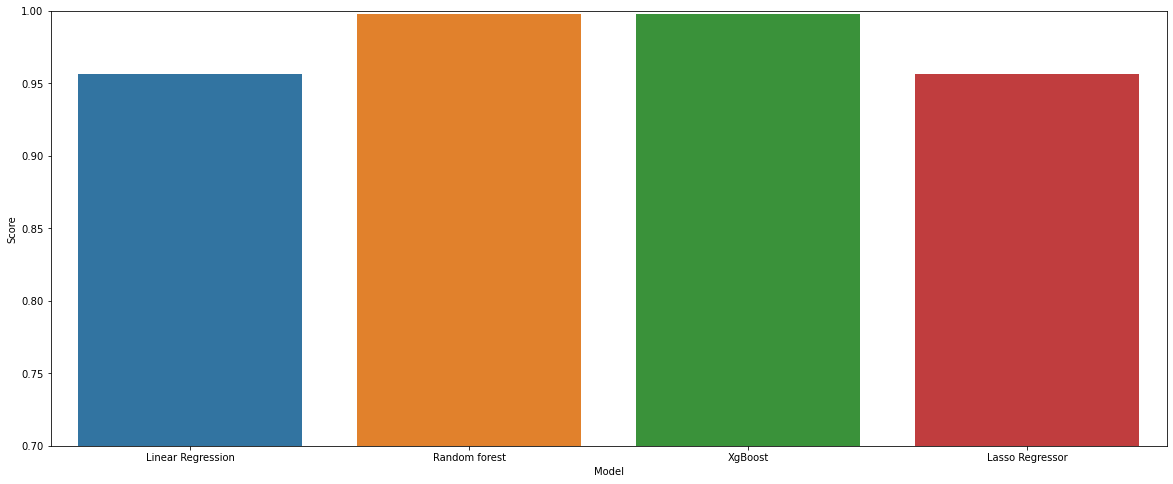

In [107]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.70, 1)
plt.show()